# Exometabolomics data processing and visualization

In [4]:
import pandas as pd
import BFAIR.exometabolomics as exomet

## 1.  Get the data from the Tecan OD Analyzer: OD600 and growth rate


The growth rate and the biomass / dry cell weight is calculated from the Tecan OD Analyzer measurements. The file "Annotations.xlsx" contains the calculated growth rates (mu max) and the file  "Data_series.xlsx" contains the OD 600 measurements for different time points. We need the last OD600 measurement to calculate the dry cell weight. The Tecan OD Analyzer data has already been background corrected and multiplied according to the dilution. 

In [5]:
# Load the OD 600 data
df_DataSeries = pd.read_excel("data/exometabolomics_example/Data_series.xlsx")
# Load the growth rate date
df_Annotations = pd.read_excel("data/exometabolomics_example/Annotations.xlsx", index_col=0)

# Extract the last OD600 measurement and the exp growth rate from the data frames
df_OD = exomet.extract_growthData(df_DataSeries, df_Annotations)
df_OD

,samplename_OD,OD600,mu[/h]
0,BS1_A1,0.912308,0.786367
1,BS1_B1,0.902794,0.339533
2,BS1_C1,0.918317,0.737921
3,BS1_D1,0.859232,0.501317
4,BS1_E1,0.857730,0.241848
...,...,...,...
251,BS4_D8,0.578761,0.249321
252,BS4_E8,0.620207,0.364156
253,BS4_F8,0.627608,0.403591
254,BS4_G8,0.592083,0.453838


### 1.2 Calculate the cell dry weight

To calculate the cell dry weight from the OD 600 measurements we need the OD to biomass ratio [g/L*OD].

In [6]:
# OD to biomass ratio: Ecoli
OD2biomass = 3.37723742070839

In [7]:
# Add a column for the biomass
df_OD["CDW[g/L]"] = df_OD["OD600"] * OD2biomass
df_OD

,samplename_OD,OD600,mu[/h],CDW[g/L]
0,BS1_A1,0.912308,0.786367,3.081081
1,BS1_B1,0.902794,0.339533,3.048951
2,BS1_C1,0.918317,0.737921,3.101373
3,BS1_D1,0.859232,0.501317,2.901830
4,BS1_E1,0.857730,0.241848,2.896757
...,...,...,...,...
251,BS4_D8,0.578761,0.249321,1.954615
252,BS4_E8,0.620207,0.364156,2.094587
253,BS4_F8,0.627608,0.403591,2.119582
254,BS4_G8,0.592083,0.453838,1.999606


## 2.  Get the data from the HPLC: metabolite concentrations

From the feature files we get the metabolite concentration of the exo-metabolome.
First, we define all the variables that are needed:

In [8]:
# Directory of the .featureXML folder
features_dirpath = "data/exometabolomics_example/features"

# Sequence file name
sequence_path = "data/exometabolomics_example/sequence.csv"

# Name of the sample group
samplegroup = "Ecoli"

We start by loading the sequence sheet and selecting only those rows that contain the samples we are interested in.

In [9]:
# Load the sequence.csv 
df_sequence = pd.read_csv(sequence_path)
# Select the rows with the relevant samples
df_sequence = df_sequence.loc[df_sequence["sample_group_name"] == samplegroup]
df_sequence

,sample_name,sample_name_original,sample_type,sample_group_name,sequence_segment_name,original_filename,batch_name,rack_number,plate_number,pos_number,...,dilution_factor,inj_volume,inj_volume_units,operator_name,acq_method_name,proc_method_name,acquisition_date_and_time,scan_polarity,scan_mass_low,scan_mass_high
17,GB6_RI_1,E. coli Dilution 8,Unknown,Ecoli,EcoliPputida,GB6_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
18,GB7_RI_1,E. coli Dilution 8,Unknown,Ecoli,EcoliPputida,GB7_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
19,GB8_RI_1,E. coli Dilution 8,Unknown,Ecoli,EcoliPputida,GB8_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
20,GB9_RI_1,E. coli Dilution 8,Unknown,Ecoli,EcoliPputida,GB9_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
21,GB10_RI_1,E. coli Dilution 7,Unknown,Ecoli,EcoliPputida,GB10_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
22,GB11_RI_1,E. coli Dilution 7,Unknown,Ecoli,EcoliPputida,GB11_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
23,GB12_RI_1,E. coli Dilution 7,Unknown,Ecoli,EcoliPputida,GB12_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
24,GC1_RI_1,E. coli Dilution 7,Unknown,Ecoli,EcoliPputida,GC1_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
25,GC2_RI_1,E. coli Dilution 6,Unknown,Ecoli,EcoliPputida,GC2_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0
26,GC3_RI_1,E. coli Dilution 6,Unknown,Ecoli,EcoliPputida,GC3_RI_1,b,NaN,NaN,NaN,...,NaN,20,uL,NaN,HPLC_OA_RI,NaN,NaN,positive,0,0


Now we extract the metabolite concentrations from the feature files for each of those samples and convert them from g/L to mM.

In [10]:
# Dilution factor, in case the HPLC samples were diluted before measurement
dilution = 2

df_HPLC = exomet.extract_concentrations(df_sequence, features_dirpath, dil = dilution)

In [11]:
df_HPLC.metabolite.unique()

array(['2kg', 'etoh', 'glc', 'glucon', 'pyr', 'ac', 'L-lac', 'glyc',
       'for'], dtype=object)

In [12]:
# Molecular weights of the metabolites
dict_MW = {"2kg": 194.14, 
           "etoh": 46.07 ,
           "glc": 180.16 , 
           "glucon": 196.155,            
           "pyr": 87.05, 
           "ac": 59.04,
           "L-lac": 90.08,
           "glyc": 92.09,  
           "for": 45.017 ,
           #"succ": 116.07,
          }

# Convert metabolite concentration to mmol/L
df_HPLC["conc[mM]"] = df_HPLC["conc[g/L]"] / df_HPLC["metabolite"].map(dict_MW) * 1000
df_HPLC

,sample_name_original,samplename_HPLC,metabolite,conc[g/L],conc[mM]
0,E. coli Dilution 8,GB6_RI_1,2kg,8.384537,43.188098
1,E. coli Dilution 8,GB6_RI_1,etoh,92.246643,2002.314796
2,E. coli Dilution 8,GB6_RI_1,glc,4.202177,23.324694
3,E. coli Dilution 8,GB6_RI_1,glucon,6.039328,30.788552
4,E. coli Dilution 8,GB6_RI_1,pyr,17.206542,197.662747
...,...,...,...,...,...
193,E. coli Dilution 1,GE1_RI_1,for,0.111183,2.469796
194,E. coli Dilution 1,GE1_RI_1,glc,0.196347,1.089846
195,E. coli Dilution 1,GE1_RI_1,glucon,0.297941,1.518907
196,E. coli Dilution 1,GE1_RI_1,glyc,0.079612,0.864497


Next, we have to add two columns specifying the replica and dilution. For this use an excel sheet, which we previously created that specifies which sample name belongs to which dilution and replica.

In [14]:
df_RepDil = pd.read_excel("data/exometabolomics_example/HPLC_repdil.xlsx")

In [15]:
df_HPLC = pd.merge(df_HPLC, df_RepDil, how="left", on="samplename_HPLC")
df_HPLC

,sample_name_original,samplename_HPLC,metabolite,conc[g/L],conc[mM],replica,dilution_step
0,E. coli Dilution 8,GB6_RI_1,2kg,8.384537,43.188098,1,8
1,E. coli Dilution 8,GB6_RI_1,etoh,92.246643,2002.314796,1,8
2,E. coli Dilution 8,GB6_RI_1,glc,4.202177,23.324694,1,8
3,E. coli Dilution 8,GB6_RI_1,glucon,6.039328,30.788552,1,8
4,E. coli Dilution 8,GB6_RI_1,pyr,17.206542,197.662747,1,8
...,...,...,...,...,...,...,...
193,E. coli Dilution 1,GE1_RI_1,for,0.111183,2.469796,4,1
194,E. coli Dilution 1,GE1_RI_1,glc,0.196347,1.089846,4,1
195,E. coli Dilution 1,GE1_RI_1,glucon,0.297941,1.518907,4,1
196,E. coli Dilution 1,GE1_RI_1,glyc,0.079612,0.864497,4,1


## 3. Merge the two dataframes

To combine the dataframe containing the metabolite concentrations with the dataframe containing the growth information,  we need to connect the sample names from the HPLC data with the sample names from the growth data.

In [16]:
# Sample group to plate
group2plate = {"Ecoli": "BS1",
               "Pputida": "BS2",
               "Yeast": "BS3", 
               "EcoliAn": "BS4"
              }
# Replica number to row layout
rep2row = {1: "A", 
           2: "B", 
           3: "C", 
           4: "D", 
           5: "E", 
           6: "F", 
           7: "G", 
           8: "H"
          }
# Dilution step to column layout
dil2col = {1: "1", 
           2: "2", 
           3: "3", 
           4: "4", 
           5: "5", 
           6: "6", 
           7: "7", 
           8: "8"
          }

In [17]:
# Add column with the sample name from the growth data to the dataframe with the concentrations 
df_HPLC["samplename_OD"] =  group2plate[samplegroup] + "_" + df_HPLC["replica"].map(rep2row) + df_HPLC["dilution_step"].map(dil2col)

# Merge the dataframes
df_data = pd.merge(df_HPLC, df_OD, how="left", on="samplename_OD")
df_data

,sample_name_original,samplename_HPLC,metabolite,conc[g/L],conc[mM],replica,dilution_step,samplename_OD,OD600,mu[/h],CDW[g/L]
0,E. coli Dilution 8,GB6_RI_1,2kg,8.384537,43.188098,1,8,BS1_A8,0.175752,NaN,0.593556
1,E. coli Dilution 8,GB6_RI_1,etoh,92.246643,2002.314796,1,8,BS1_A8,0.175752,NaN,0.593556
2,E. coli Dilution 8,GB6_RI_1,glc,4.202177,23.324694,1,8,BS1_A8,0.175752,NaN,0.593556
3,E. coli Dilution 8,GB6_RI_1,glucon,6.039328,30.788552,1,8,BS1_A8,0.175752,NaN,0.593556
4,E. coli Dilution 8,GB6_RI_1,pyr,17.206542,197.662747,1,8,BS1_A8,0.175752,NaN,0.593556
...,...,...,...,...,...,...,...,...,...,...,...
193,E. coli Dilution 1,GE1_RI_1,for,0.111183,2.469796,4,1,BS1_D1,0.859232,0.501317,2.901830
194,E. coli Dilution 1,GE1_RI_1,glc,0.196347,1.089846,4,1,BS1_D1,0.859232,0.501317,2.901830
195,E. coli Dilution 1,GE1_RI_1,glucon,0.297941,1.518907,4,1,BS1_D1,0.859232,0.501317,2.901830
196,E. coli Dilution 1,GE1_RI_1,glyc,0.079612,0.864497,4,1,BS1_D1,0.859232,0.501317,2.901830


### 3.1 Volume correction of the metabolite concentrations

The growth data from the Tecan OD Analyzer has been already corrected for volume loss during the cultivation. This has to be done for the metabolite concentrations too.

In [18]:
# Correction values for the different bioshakers
correction_value = {"BS1": 0.01282715182494869, 
                    "BS2": 0.2224416823779151, 
                    "BS3": -0.012615395805251789,
                    "BS4": 0.02313791659097142,
                   }

df_data["corr_conc[mM]"] = df_data["conc[mM]"] / (df_data["samplename_OD"].str[:3].map(correction_value) + 1)
df_data

,sample_name_original,samplename_HPLC,metabolite,conc[g/L],conc[mM],replica,dilution_step,samplename_OD,OD600,mu[/h],CDW[g/L],corr_conc[mM]
0,E. coli Dilution 8,GB6_RI_1,2kg,8.384537,43.188098,1,8,BS1_A8,0.175752,NaN,0.593556,42.641133
1,E. coli Dilution 8,GB6_RI_1,etoh,92.246643,2002.314796,1,8,BS1_A8,0.175752,NaN,0.593556,1976.956080
2,E. coli Dilution 8,GB6_RI_1,glc,4.202177,23.324694,1,8,BS1_A8,0.175752,NaN,0.593556,23.029294
3,E. coli Dilution 8,GB6_RI_1,glucon,6.039328,30.788552,1,8,BS1_A8,0.175752,NaN,0.593556,30.398624
4,E. coli Dilution 8,GB6_RI_1,pyr,17.206542,197.662747,1,8,BS1_A8,0.175752,NaN,0.593556,195.159408
...,...,...,...,...,...,...,...,...,...,...,...,...
193,E. coli Dilution 1,GE1_RI_1,for,0.111183,2.469796,4,1,BS1_D1,0.859232,0.501317,2.901830,2.438517
194,E. coli Dilution 1,GE1_RI_1,glc,0.196347,1.089846,4,1,BS1_D1,0.859232,0.501317,2.901830,1.076044
195,E. coli Dilution 1,GE1_RI_1,glucon,0.297941,1.518907,4,1,BS1_D1,0.859232,0.501317,2.901830,1.499670
196,E. coli Dilution 1,GE1_RI_1,glyc,0.079612,0.864497,4,1,BS1_D1,0.859232,0.501317,2.901830,0.853548


## 4. Calculate the specific uptake/secretion rates for each replica

First, we fit linear regression model with the cell dry weight as x and the metabolite concentration as y. With "n_min" we can specify the minimum number of datapoints necessary to fit a linear model. Then, the slope from the linear model is multiplied with the growth rate to calculate the specific uptake/secretion rate of each metabolite.

In [19]:
df_rates = exomet.calculate_rates(df_data, n_min=4)
df_rates

,metabolite,replica,mu[/h],intercept[mM],slope[mmol/gDCW],r-squared,rate[mmol/gDCW/h]
0,2kg,1,0.786367,44.153898,0.377608,0.038652,0.296939
1,2kg,2,0.748089,43.564127,1.296743,0.664119,0.970079
2,2kg,3,1.048371,46.615921,-0.229110,0.057120,-0.240192
3,2kg,4,0.889047,46.683621,-0.047626,0.001302,-0.042342
4,etoh,1,0.786367,1531.024868,-496.340076,0.676341,-390.305648
5,etoh,2,0.748089,1444.509035,-484.059490,0.641792,-362.119490
6,etoh,3,1.048371,1108.962968,-368.579541,0.517243,-386.407942
7,etoh,4,0.889047,940.701312,-314.157321,0.485646,-279.300470
8,glc,1,0.786367,29.604264,-9.483779,0.990791,-7.457735
9,glc,2,0.748089,29.754820,-9.937475,0.991325,-7.434114


Lets specify which metabolites are of interest. 

In [20]:
df_rates.metabolite.unique()

array(['2kg', 'etoh', 'glc', 'glucon', 'pyr', 'ac'], dtype=object)

In [21]:
metabolites = ["glc", "etoh", "ac"]

Lets visualize what we have calculated here. First, we look at each replica individually, to check the quality of the calculated rates. Each datapoint is annotated according to its dilution step.

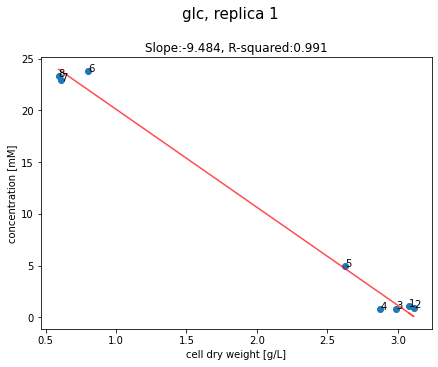

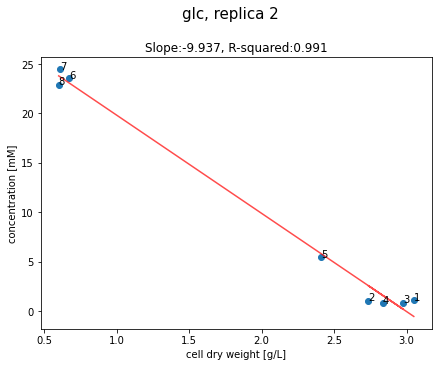

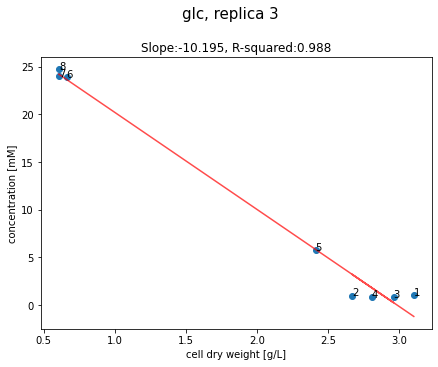

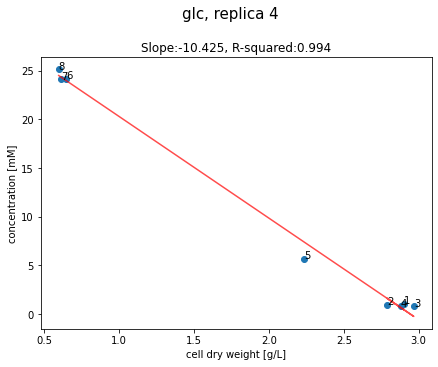

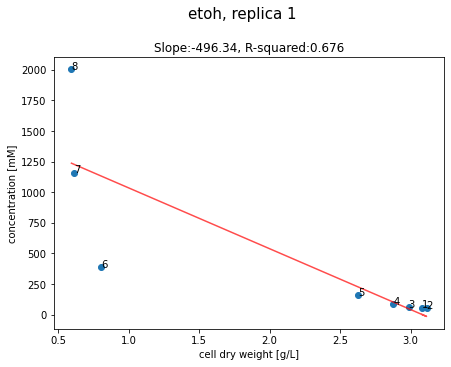

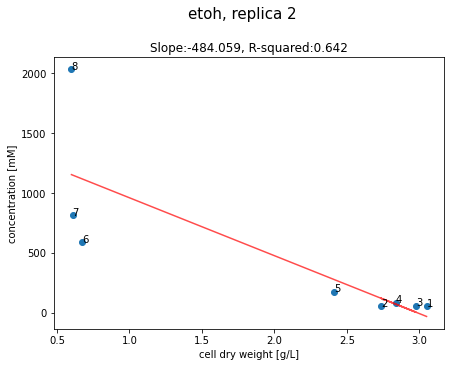

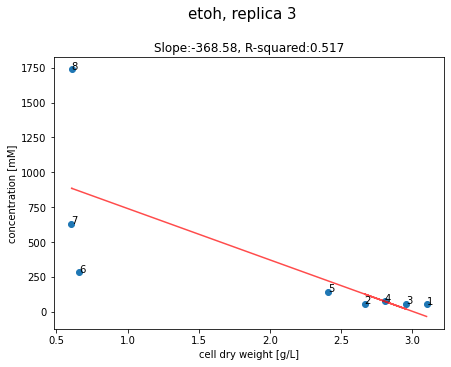

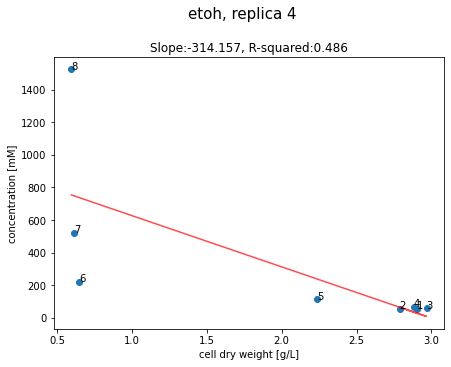

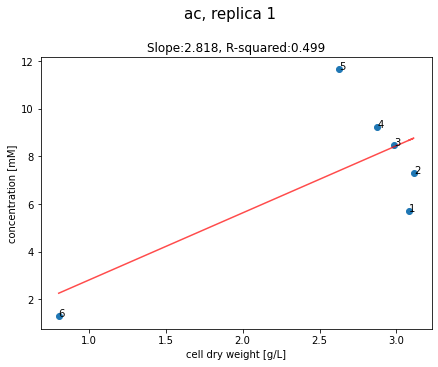

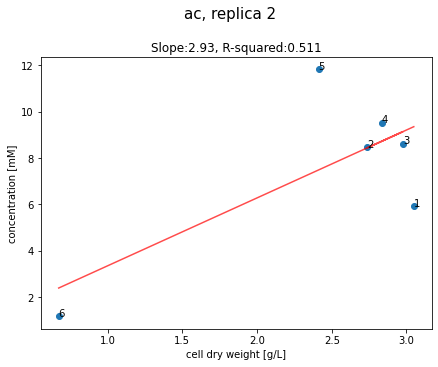

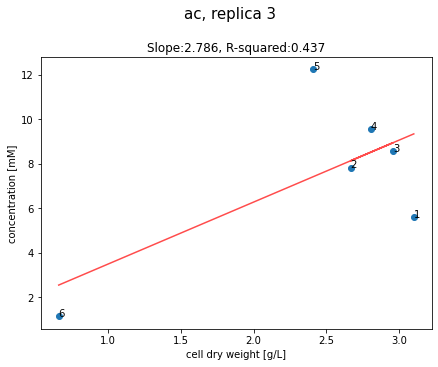

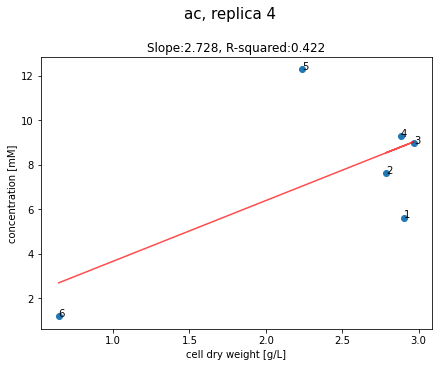

In [22]:
for met in metabolites:
    df_rates2 = df_rates.loc[df_rates["metabolite"] == met]
    for rep in df_rates2.replica.unique():
        exomet.plot_oneReplica(df_data=df_data, df_rates=df_rates, metabolite=met, replica=rep)

To compare the replicates with each other, we plot them together.

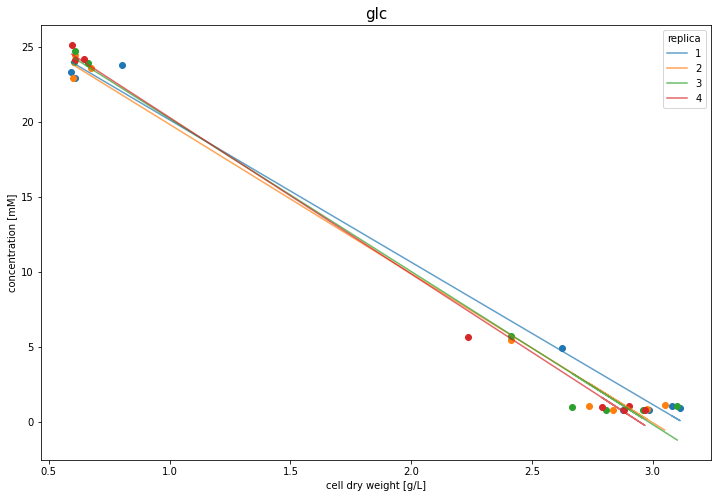

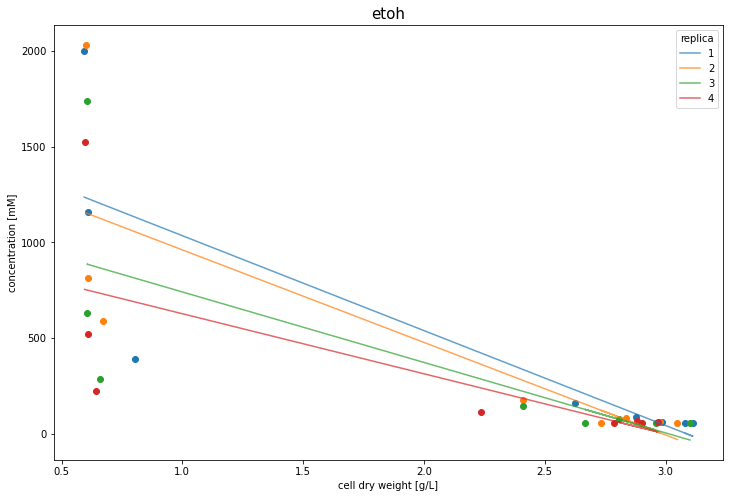

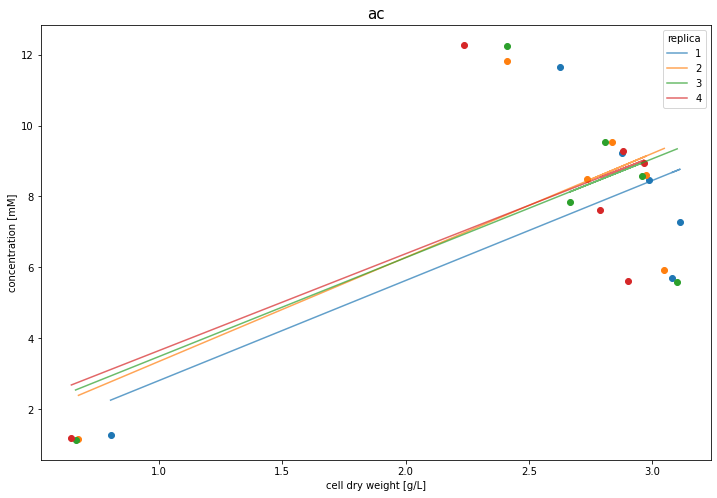

In [23]:
for met in metabolites:
    exomet.plot_allReplica(df_data=df_data, df_rates=df_rates, metabolite=met, annotation=False)

## 5. Calculate the mean and standard deviation of the rates

The units of the mean is mmol/(gDCW\*h) and the units of the standard deviation is mmol/(gDCW\*h)

In [24]:
results = exomet.calculate_mean(df_rates)
results = results[results["metabolite"].isin(metabolites)]
results

,metabolite,mean,std
1,ac,2.438217,0.337961
2,etoh,-354.533388,51.682308
3,glc,-8.712117,1.572778
